# Split Plots

In [2]:
# Libraries
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import json
from simulation.trajectory_sampler import *
from envs import *
from policies import *
from data_processors import *
from tqdm import tqdm

# CLR Test

In [354]:
# Path to results_debug
path = [
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_00001_lq_10_split_policy_1_var_01_24_05_10-19_32_",
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_1_var_01_24_05_11-17_16_",
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_1_var_01_24_05_11-18_55_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_12-18_26_" #5 split
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_12-18_35_" # 10 split bad
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_12-18_42_" # 10 split horrible
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_12-18_57_" # 10 buono
# /Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_13-14_17_" # 10 buono
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_13-14_38_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_13-16_13_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_13-16_21_" #dim = 2
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_13-16_29_" #dim = 2
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_13-19_07_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_1_var_01_24_05_13-22_05_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_1_var_01_24_05_14-12_21_" #test
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_2_var_01_24_05_14-15_58_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_1_var_01_24_05_14-15_46_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_swimmer_500_split_policy_2_var_01_24_05_15-01_07_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_lq_10_split_policy_1_var_01_24_05_15-15_44_" #lq 1x1
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_adam_001_lq_20_split_policy_2_var_01_24_05_15-17_08_" #lq 2x2 adam
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_20_split_policy_2_var_01_24_05_15-17_38_" #1e-4
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_20_split_policy_2_var_01_24_05_15-17_42_" #1e-5
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_swimmer_10_split_policy_2_var_01_24_05_15-18_40_"
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_2_var_01_24_05_15-18_43_"
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_adam_001_lq_10_split_policy_2_var_01_24_05_15-19_12_" #1e-1
"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_2_var_01_24_05_15-19_34_" #grad normalizzati
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results_debug.json"
    file = open(name)
    data.append(json.load(file))

In [32]:
print(list(data[0].keys()))

['performance', 'best_theta', 'thetas_history', 'last_theta', 'best_perf', 'split_ite']


<Figure size 640x480 with 0 Axes>

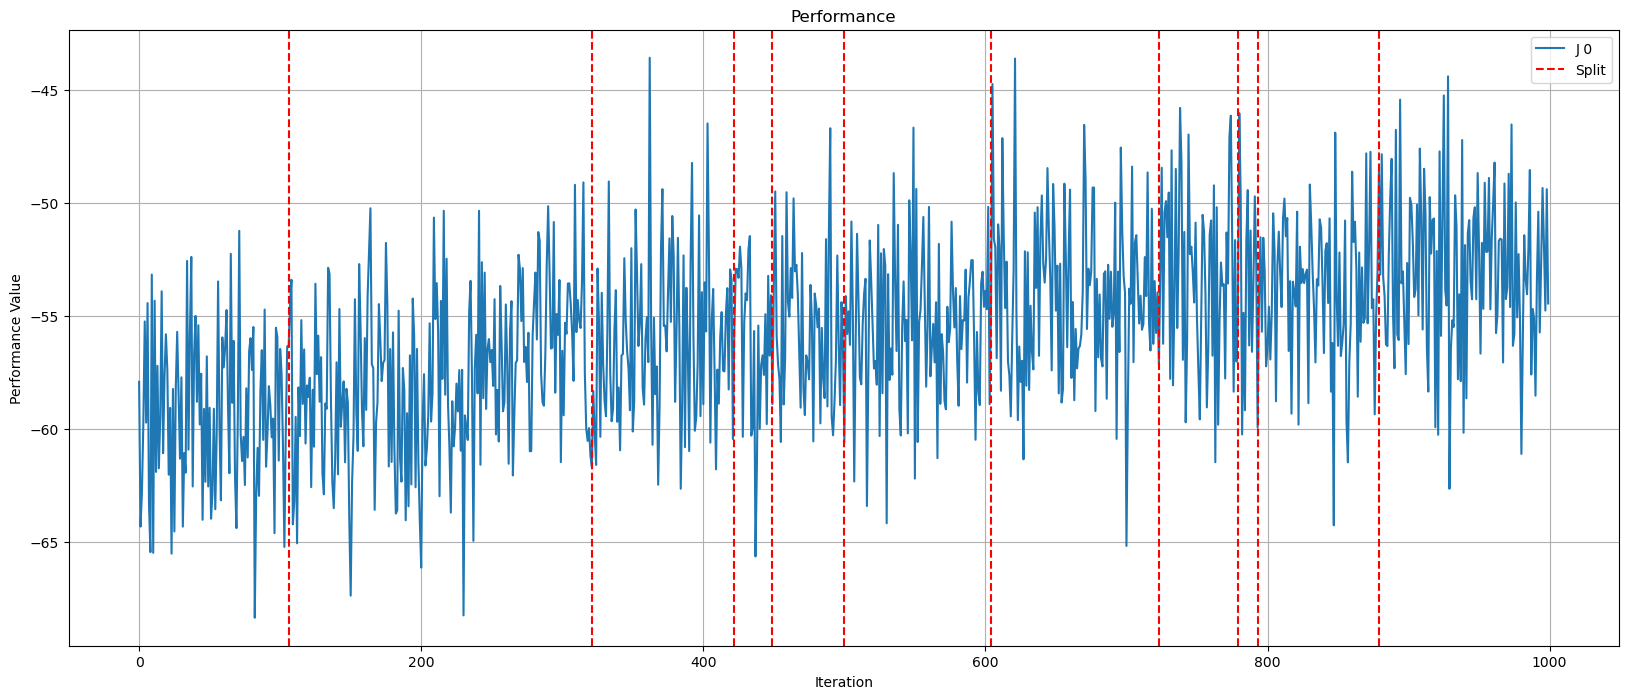

In [355]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")
    
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# Fixed discretization

In [455]:
# Path to results_debug
path = [
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_00001_lq_10_split_policy_1_var_01_24_05_10-17_57_"
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_adam_001_lq_10_split_policy_1_var_01_24_05_12-19_12_" # adam 10
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_adam_001_lq_10_split_policy_1_var_01_24_05_12-19_28_" # adam 10
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_adam_001_lq_10_split_policy_1_var_01_24_05_12-19_36_" # adam 10
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_adam_001_lq_10_split_policy_1_var_01_24_05_13-14_03_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_swimmer_500_split_policy_2_var_01_24_05_15-14_03_"
"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_swimmer_500_split_policy_2_var_01_24_05_15-18_30_"
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results_debug.json"
    file = open(name)
    data.append(json.load(file))

In [20]:
print(list(data[0].keys()))

['performance', 'best_theta', 'thetas_history', 'last_theta', 'best_perf']


<Figure size 640x480 with 0 Axes>

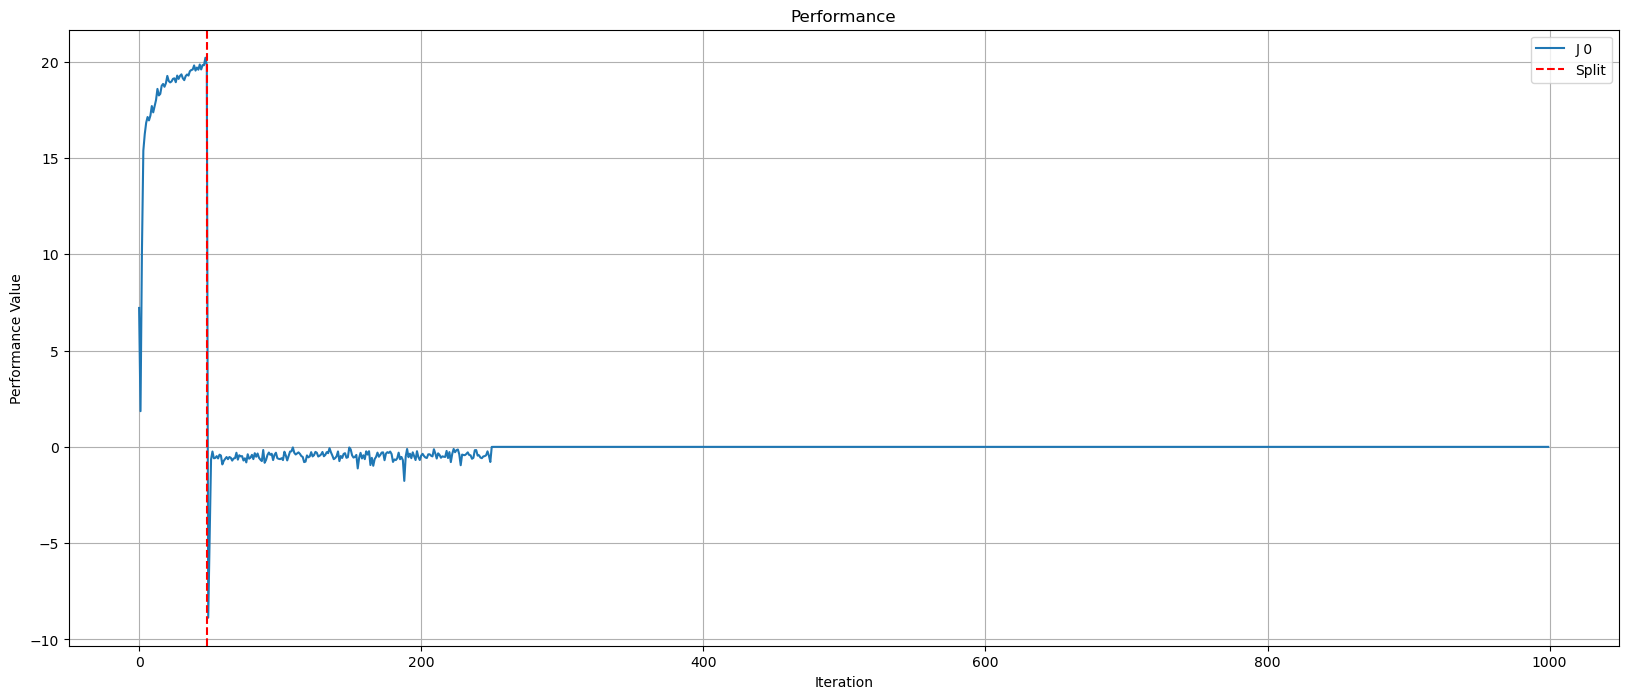

In [456]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")


for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)


plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# ADAM Test

In [555]:
# Path to results_debug
path = [
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_adam_001_lq_10_split_policy_1_var_01_24_05_11-20_42_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_mountain_car_50_split_policy_1_var_01_24_05_12-18_09_"
#"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1500_clr_0001_lq_10_lingauss_policy_1_var_01_24_05_13-12_11_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1500_clr_0001_lq_10_lingauss_policy_1_var_01_24_05_13-14_37_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1500_clr_0001_mountain_car_10_split_policy_1_var_01_24_05_13-15_08_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_lq_10_lingauss_policy_1_var_01_24_05_13-19_33_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_lq_10_split_policy_1_var_01_24_05_13-19_37_"
# "/Users/gianmarcotedeschi/<
# Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_lq_10_lingauss_policy_4_var_01_24_05_14-15_53_" #lq 2x2 lingauss
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_lq_10_lingauss_policy_1_var_01_24_05_14-19_59_"
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1500_clr_0001_swimmer_500_lingauss_policy_16_var_01_24_05_15-13_45_" #linear swimmer
# "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_adam_001_lq_20_lingauss_policy_4_var_01_24_05_15-17_00_", #linear lq 2x2 adam
"/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_lq_10_lingauss_policy_4_var_01_24_05_16-18_42_"
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/pg_results.json"
    file = open(name)
    data.append(json.load(file))

<Figure size 640x480 with 0 Axes>

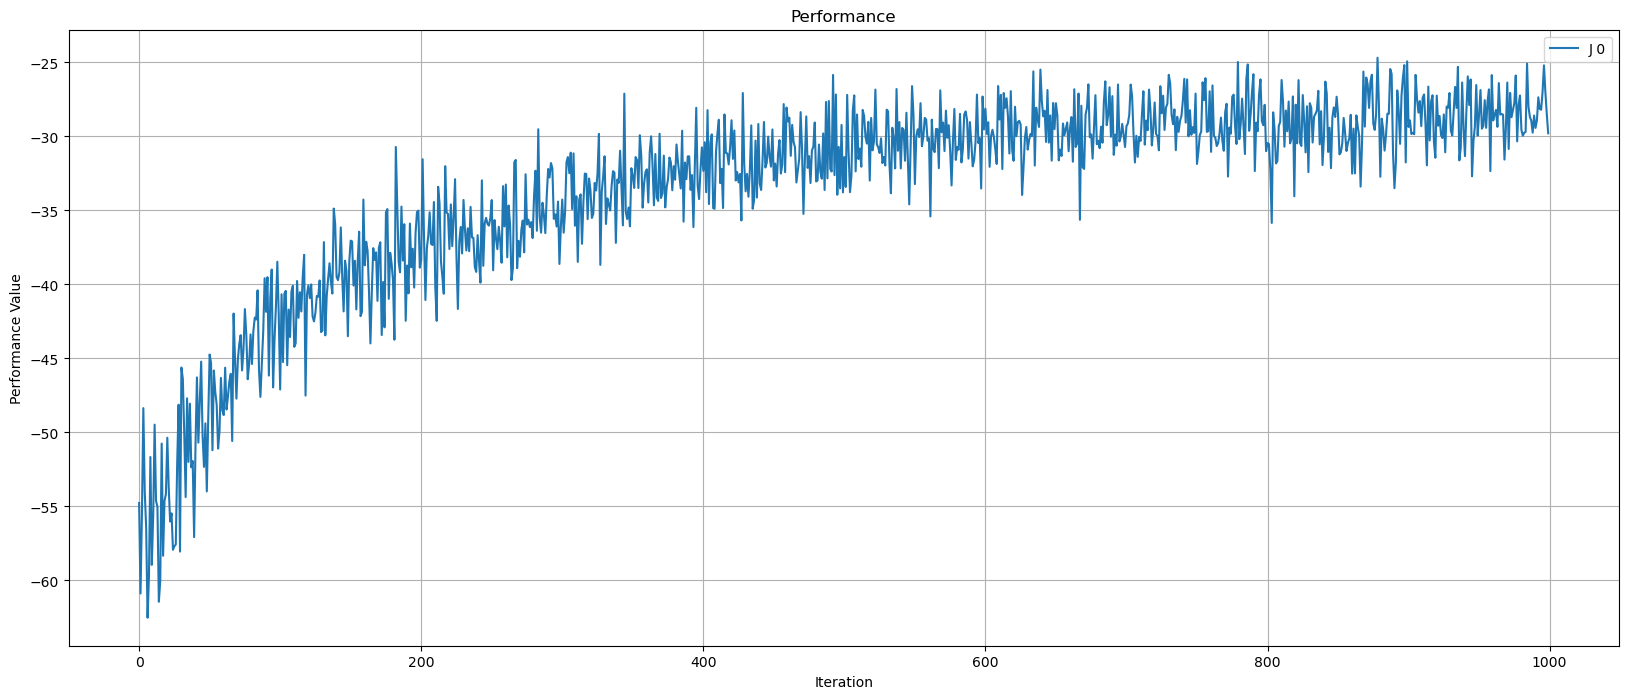

In [556]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")
    
# for point in d["split_ite"]:
#     plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# SWIMMER

In [530]:
# Path to results_debug
path = [
    "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_swimmer_500_split_policy_2_var_01_24_05_15-19_57_" #1e-3, alpha=0.1, h=500, gamma=.99
    # "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_adam_001_swimmer_200_split_policy_2_var_01_24_05_16-13_56_" #adam 1e-2, alpha=0.1, h=200, gamma=.99
]

path_lin = [
    "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_swimmer_200_lingauss_policy_16_var_01_24_05_16-14_21_" #1e-4, gamma=.99
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

<Figure size 640x480 with 0 Axes>

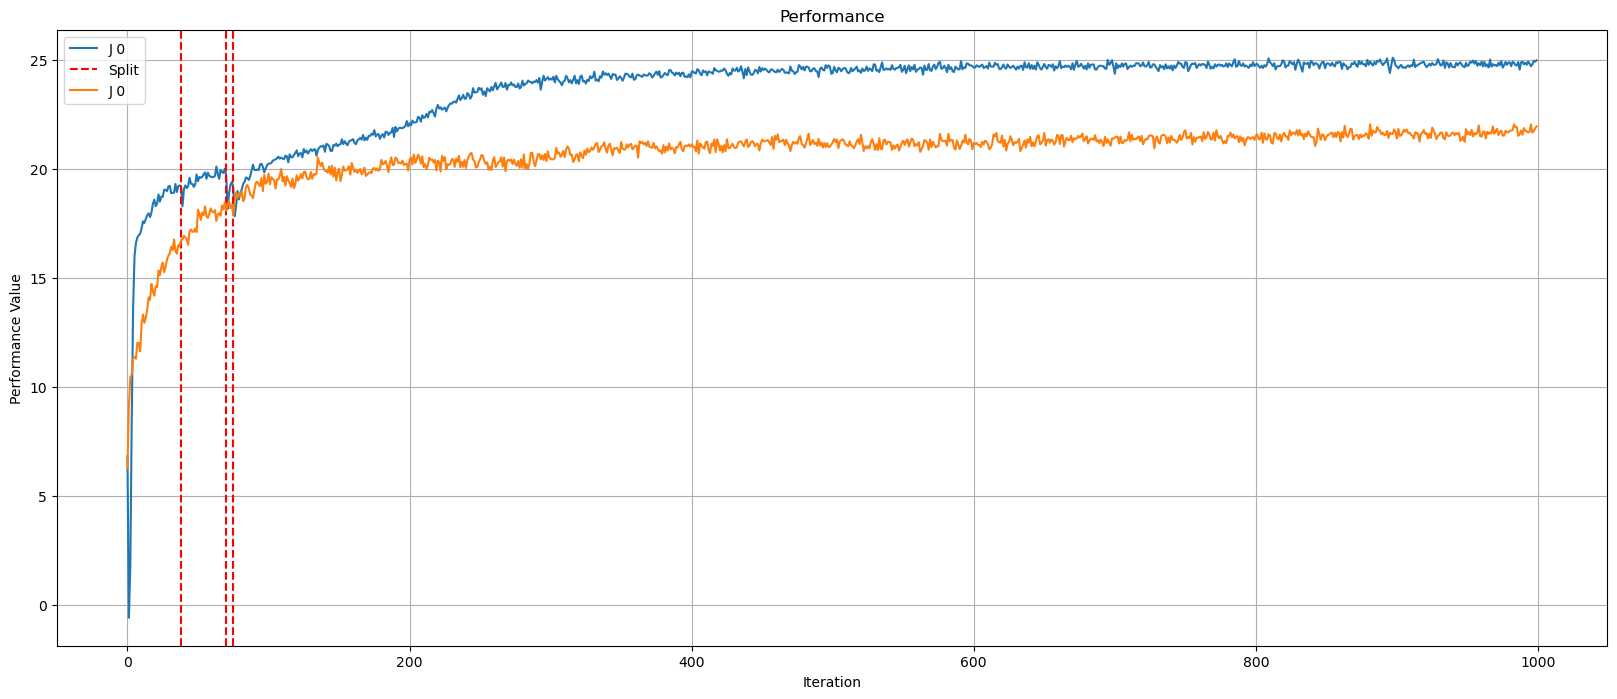

In [531]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# HALF CHEETAH

In [563]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_half_cheetah_200_split_policy_6_var_01_24_05_15-19_58_" #1e-3, alpha=0.1, gamma=.99
    # "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_half_cheetah_200_split_policy_6_var_01_24_05_15-21_49_" #1e-4, alpha=0.2, gamma=.99
    "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_half_cheetah_200_split_policy_6_var_01_24_05_16-13_57_" #1e-4, alpha=0.3, gamma=.99
]

path_lin = [
    "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_half_cheetah_200_lingauss_policy_102_var_01_24_05_16-14_20_" #1e-4, gamma=.99
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

<Figure size 640x480 with 0 Axes>

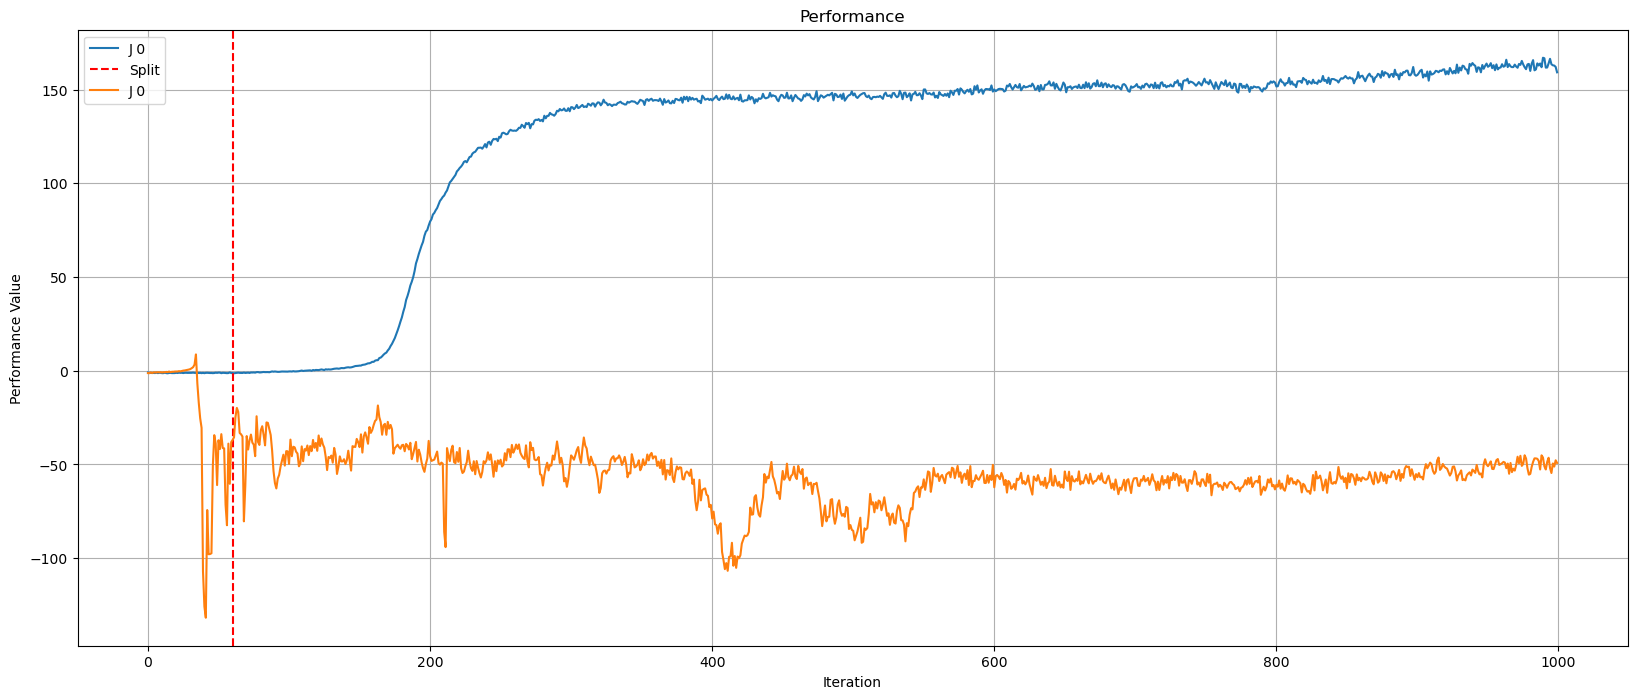

In [564]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")
    

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# ANT

In [565]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_ant_200_split_policy_8_var_01_24_05_15-20_01_" #1e-3, alpha=0.1, gamma=.99
    # "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_ant_200_split_policy_8_var_01_24_05_15-21_53_" #1e-3, alpha=0.2, gamma=.99
    "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_ant_200_split_policy_8_var_01_24_05_16-13_55_" #1e-4, alpha=0.2, gamma=.99
]

path_lin = [
    "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_ant_200_lingauss_policy_216_var_01_24_05_16-14_23_" #1e-4, gamma=.99
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

<Figure size 640x480 with 0 Axes>

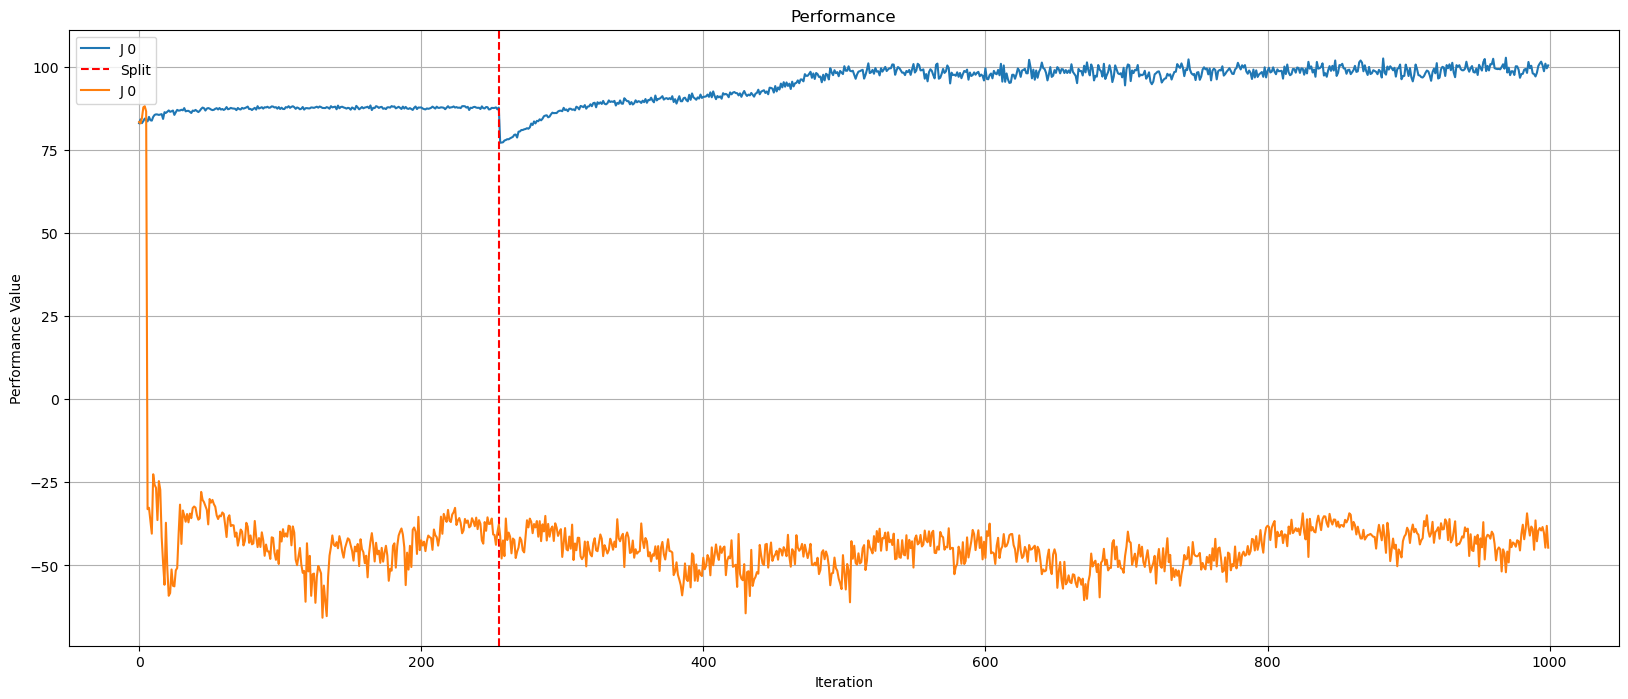

In [566]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# HOPPER

In [561]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_hopper_100_split_policy_3_var_01_24_05_16-18_08_" #1e-3
    "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/split/split_test_1000_clr_0001_hopper_100_split_policy_3_var_01_24_05_16-18_11_" #1e-5
]

path_lin = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_hopper_100_lingauss_policy_33_var_01_24_05_16-18_02_" #1e-3
    # "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_hopper_100_lingauss_policy_33_var_01_24_05_16-18_30_" #1e-3
    "/Users/gianmarcotedeschi/Projects/learnRL/results_debug/pg/pg_test_1000_clr_0001_hopper_100_lingauss_policy_33_var_01_24_05_16-18_39_" #1e-3
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

<Figure size 640x480 with 0 Axes>

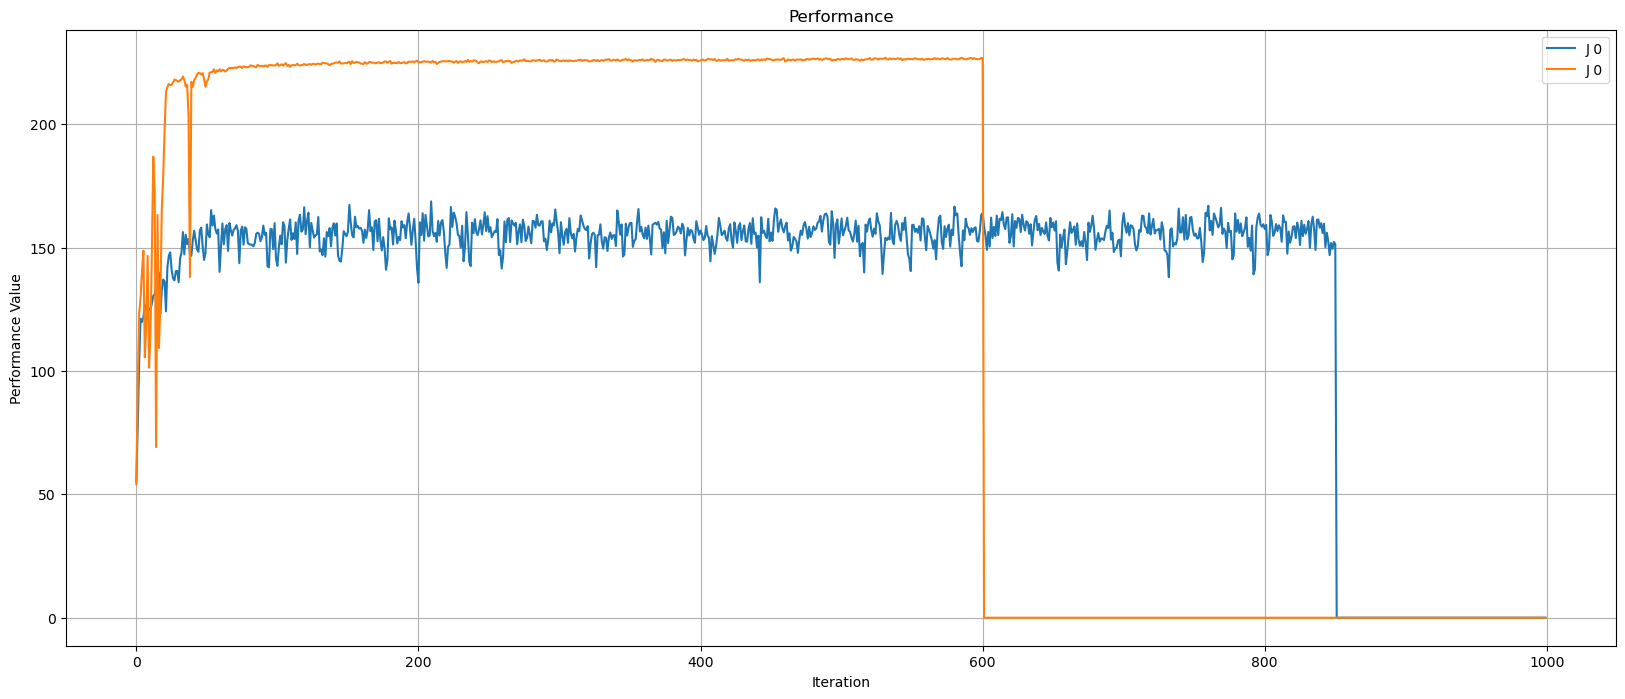

In [562]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i}")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()